<a href="https://colab.research.google.com/github/Pythonimeislabor/repo1/blob/main/erstes_neuronales_Netz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datensatz von kaggle herunterladen

In [ ]:
%%writefile kaggle.json
{"username":"lutze3","key":"c1b954a36f5402b976973271cb154a2f"}

Writing kaggle.json


In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!kaggle datasets download -d jcprogjava/handwritten-digits-dataset-not-in-mnist
!unzip handwritten-digits-dataset-not-in-mnist.zip

from IPython.display import clear_output
clear_output()

# imports

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Testweise ein Bild laden und anzeigen

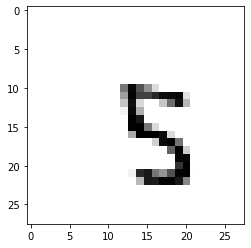

In [ ]:
dateipfad = "dataset/5/5/0.png"
bild = cv2.imread(dateipfad, cv2.IMREAD_UNCHANGED) # bild lesen
plt.imshow(bild)

(28, 28)


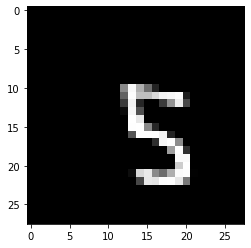

In [ ]:
bild_in_grau = bild[:,:,3]
print(bild_in_grau.shape)
plt.imshow(bild_in_grau, cmap="gray")

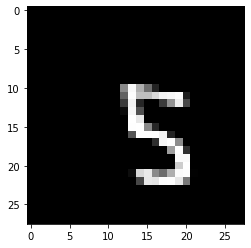

In [ ]:
bild_0_1 = bild_in_grau / 255 # bild zwischen 0 und 1 skalieren
plt.imshow(bild_0_1, cmap = "gray")

# Alle Bilder und Beschriftungen in 2 Listen speichern

In [ ]:
#X = [bild1, bild2, bild3]
#Y = [Beschriftung1, Beschriftung2, Beschriftung3]

X = []
Y = []

import os

def lade_bild(pfad):
  bild = cv2.imread(pfad, cv2.IMREAD_UNCHANGED) # bild lesen
  bild_in_grau = bild[:,:,3]
  bild_0_1 = bild_in_grau / 255 # bild zwischen 0 und 1 skalieren
  return bild_0_1


for zahl in range(10):
  pfad = "dataset/"+str(zahl)+"/"+str(zahl) + "/"
  print(pfad)
  alle_bilder_namen = os.listdir(pfad) # alle bilder im pfad auflisten
  for name in alle_bilder_namen: # alle bilder in dem Ordner durchgehen
    pfad_zum_bild = pfad + name 
    bild = lade_bild(pfad_zum_bild)

    X.append(bild)
    Y.append(zahl)

dataset/0/0/
dataset/1/1/
dataset/2/2/
dataset/3/3/
dataset/4/4/
dataset/5/5/
dataset/6/6/
dataset/7/7/
dataset/8/8/
dataset/9/9/


Y ist  4


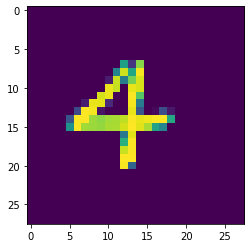

In [ ]:
index = 50000

plt.imshow(X[index]), 
print("Y ist ", Y[index])

In [ ]:
import numpy as np

# listen in numpy arrays umwandeln
Y = np.array(Y) # numpy arrays sind für viele Elemente eine bessere speichermethode
X = np.array(X) # tensorflow benötigt numpy arrays und kann nicht mit listen arbeiten

p = np.random.permutation(Y.shape[0]) # X und Y gleichmäßig mischen
X = X[p]
Y = Y[p] 

# Neuronales Netzwerk bauen

In [43]:
import tensorflow as tf

inputlayer = tf.keras.layers.Input(shape=(28,28))
platt_gemacht = tf.keras.layers.Flatten()(inputlayer)
dense1 = tf.keras.layers.Dense(16,activation="sigmoid")(platt_gemacht)
dense2 = tf.keras.layers.Dense(16,activation="sigmoid")(dense1)
output = tf.keras.layers.Dense(10,activation="softmax")(dense2)

model = tf.keras.Model(inputlayer, output)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 16)                12560     
                                                                 
 dense_21 (Dense)            (None, 16)                272       
                                                                 
 dense_22 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [44]:
fehlerfunktion = tf.keras.losses.SparseCategoricalCrossentropy()
optimierer = tf.keras.optimizers.SGD(0.05, momentum = 0.5)
model.compile(optimierer, fehlerfunktion, metrics="accuracy")

In [45]:
model.fit(X, Y, batch_size = 32, epochs = 5, validation_split = 0.2) # Parameter optimieren

Epoch 1/5
2694/2694 [==============================] - 6s 2ms/step - loss: 1.8464 - accuracy: 0.4069 - val_loss: 1.0744 - val_accuracy: 0.7031
Epoch 2/5
2694/2694 [==============================] - 6s 2ms/step - loss: 0.6615 - accuracy: 0.8301 - val_loss: 0.3993 - val_accuracy: 0.9095
Epoch 3/5
2694/2694 [==============================] - 6s 2ms/step - loss: 0.2823 - accuracy: 0.9427 - val_loss: 0.2064 - val_accuracy: 0.9586
Epoch 4/5
2694/2694 [==============================] - 6s 2ms/step - loss: 0.1625 - accuracy: 0.9707 - val_loss: 0.1330 - val_accuracy: 0.9753
Epoch 5/5
2694/2694 [==============================] - 6s 2ms/step - loss: 0.1101 - accuracy: 0.9814 - val_loss: 0.0954 - val_accuracy: 0.9836
